<a href="https://colab.research.google.com/github/awagler2/NODE/blob/main/viz_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#import os
#for filename in os.listdir('/content/drive/MyDrive'):
#  print(filename)

Mounted at /content/drive


In [67]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from google.colab import data_table
from vega_datasets import data

# Load dataset
df = pd.read_csv('/content/full_imputed_final.csv',low_memory=False)
df.columns = df.columns.str.strip().str.lower()

# subset to some variables
subset_variables = ['cc_basic_2000', 'cc_undergrad_2015', 'rev_appropriations_fed', 'rev_appropriations_state', 'rev_grants_contracts_federal', 'rev_grants_contracts_state', 'exp_instruc_total', 'exp_research_total', 'exp_student_serv_total', 'exp_total_current', 'endowment_beg', 'exp_total','total_ft_undergrads','completers','prop.stem']  # List the variables you want to keep
filtered_columns = [col for col in df.columns if col in subset_variables]

#rename excellencia ratings and year
df = df.rename(columns={'excellencia_hsi_status_x': 'excellencia_hsi_status'})
df = df.rename(columns={'year_x': 'year'})

#create some new variables
df['revfedpc']=df['rev_appropriations_fed']/df['total_ft_undergrads']
df['revstatepc']=df['rev_appropriations_state']/df['total_ft_undergrads']
df['revgrantspc']=df['rev_grants_contracts_federal']/df['total_ft_undergrads']
df['revgrantsstatepc']=df['rev_grants_contracts_state']/df['total_ft_undergrads']
df['expinstpc']=df['exp_instruc_total']/df['total_ft_undergrads']
df['expresearchpc']=df['exp_research_total']/df['total_ft_undergrads']
df['expstudentservpc']=df['exp_student_serv_total']/df['total_ft_undergrads']
df['exptotalcurpc']=df['exp_total_current']/df['total_ft_undergrads']
df['endowmentpc']=df['endowment_beg']/df['total_ft_undergrads']
df['exptotalpc']=df['exp_total']/df['total_ft_undergrads']

#eligibility codes
#df['DoEhsi'] = np.where(df['hsi_code'].isin([5, 6]), 'HSI',np.where(df['hsi_code'] == 4, 'Emerging HSI', 'Non-HSI'))
#print(df[['hsi_code', 'DoEhsi']].value_counts())

compute_vars=['DoEhsi','revfedpc','revstatepc','revgrantspc','revgrantsstatepc','expinstpc','expresearchpc','expstudentservpc','exptotalpc','endowmentpc','exptotalpc']
subset_variables.extend(compute_vars)
#print(df[subset_variables].head())
#pull out relevant sectors
excluded_sectors = ['Private for-profit less-than-two-year','Private for-profit two-year', 'Private for-profit four-year or above', 'Public less-than two-year', 'Public less-than two-year', 'Administrative unit', 'Sector unknown (not active)']
df2 = df[~df['sector'].isin(excluded_sectors)]
print(df2['sector'].value_counts())
df2 = df2[~df2['year_y'].isin([2021, 2022])]
df2 = df2.rename(columns={'year_x': 'year'})

print(df2['rev_appropriations_fed'].describe())
print(df2['doe'].value_counts())




sector
Private not-for-profit four-year or above    6939
Public two-year                              6202
Public four-year or above                    4295
Private not-for-profit less-than-two-year     276
Private not-for-profit two-year               251
Name: count, dtype: int64
count    3.600000e+02
mean     7.481037e+07
std      1.948944e+08
min      1.539500e+04
25%      2.969110e+05
50%      1.224749e+06
75%      1.396085e+07
max      7.681461e+08
Name: rev_appropriations_fed, dtype: float64
doe
Non-HSI         1373
HSI              477
Emerging HSI      98
Name: count, dtype: int64


In [98]:
summary_stats = df2.groupby('excellencia_hsi_status', dropna=True)['prop.stem'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                        min       max      mean
excellencia_hsi_status                         
Emerging HSI            0.0  0.535714  0.123042
HSI                     0.0  0.266667  0.124763
Not HSI                 0.0  0.833333  0.138455


In [71]:
import pandas as pd

summary_stats = df2.groupby('excellencia_hsi_status', dropna=True)['rev_appropriations_fed'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                              min          max          mean
excellencia_hsi_status                                      
Emerging HSI            3277286.0    3277286.0  3.277286e+06
HSI                     1224749.0    1224749.0  1.224749e+06
Not HSI                   15395.0  229844000.0  2.912562e+07


In [104]:
import pandas as pd

summary_stats = df2.groupby('excellencia_hsi_status', dropna=True)['exptotalcurpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                                min           max          mean
excellencia_hsi_status                                         
Emerging HSI            1443.697070  1.412313e+05   9163.539819
HSI                     1778.876993  3.254204e+04   5579.359760
Not HSI                 1102.286918  1.748436e+06  29499.422608


In [75]:
import pandas as pd


summary_stats = df2.groupby('excellencia_hsi_status', dropna=True)['exptotalpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                              min        max        mean
excellencia_hsi_status                                  
Emerging HSI             8.659828  73615.500  360.226671
HSI                     14.163801    921.895   86.217028
Not HSI                 11.066415  29945.750  399.979206


In [86]:
import pandas as pd


summary_stats = df.groupby('excellencia_hsi_status', dropna=True)['revgrantspc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                               min            max         mean
excellencia_hsi_status                                        
Emerging HSI              0.841384   34075.668449   953.259174
HSI                     127.275818    2925.520000   738.596878
Not HSI                   0.620155  154788.004137  2294.546518


In [93]:
import pandas as pd


summary_stats = df2.groupby('excellencia_hsi_status', dropna=True)['revgrantsstatepc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                             min           max        mean
excellencia_hsi_status                                    
Emerging HSI            0.483553   3763.300165  492.025981
HSI                     7.935653   1202.292492  499.265047
Not HSI                 0.151773  24262.951334  557.087880


In [100]:
import pandas as pd


summary_stats = df2.groupby('excellencia_hsi_status', dropna=True)['endowmentpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                              min           max          mean
excellencia_hsi_status                                       
Emerging HSI             6.656578  2.406072e+05   7957.294187
HSI                     18.248177  3.162492e+04   2422.513754
Not HSI                  1.039698  2.306495e+06  35549.819983


In [101]:
import pandas as pd

#
summary_stats = df2.groupby('excellencia_hsi_status', dropna=True)['expinstpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                               min            max         mean
excellencia_hsi_status                                        
Emerging HSI            445.638722   44007.063882  3231.262066
HSI                     596.564562    9720.457500  1932.629923
Not HSI                 283.768752  121178.764219  6884.203363


In [102]:
import pandas as pd

#
summary_stats = df2.groupby('excellencia_hsi_status', dropna=True)['expresearchpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                             min            max         mean
excellencia_hsi_status                                      
Emerging HSI            0.582891   33503.208556  1507.867881
HSI                     5.865614    1243.037051    71.892276
Not HSI                 0.533792  132623.479835  4152.324515


In [119]:
import pandas as pd


summary_stats = df2.groupby('excellencia_hsi_status', dropna=True)['expstudentservpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                               min           max         mean
excellencia_hsi_status                                       
Emerging HSI            127.845767  18113.365044  1108.193542
HSI                     174.506768   4837.428107   735.810079
Not HSI                  49.201709  31015.932203  1945.898143


In [120]:
import pandas as pd

summary_stats = df2.groupby('excellencia_hsi_status', dropna=True)['student_faculty_ratio'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                        min   max       mean
excellencia_hsi_status                      
Emerging HSI            1.0  37.0  20.467333
HSI                     2.0  45.0  24.541766
Not HSI                 1.0  38.0  14.813053


In [133]:
import pandas as pd

# Calculate the mode (most frequent value) instead of the mean for 'open_admissions_policy'
summary_stats = df2.groupby('excellencia_hsi_status', dropna=True)['open_admissions_policy'].value_counts(normalize=True)


# Display the table
print(summary_stats)

excellencia_hsi_status  open_admissions_policy
Emerging HSI            Yes                       0.658667
                        No                        0.314667
                        Not applicable            0.026667
HSI                     Yes                       0.768496
                        No                        0.226730
                        Not applicable            0.004773
Not HSI                 No                        0.544000
                        Yes                       0.419789
                        Not applicable            0.036211
Name: proportion, dtype: float64


(7088, 3)


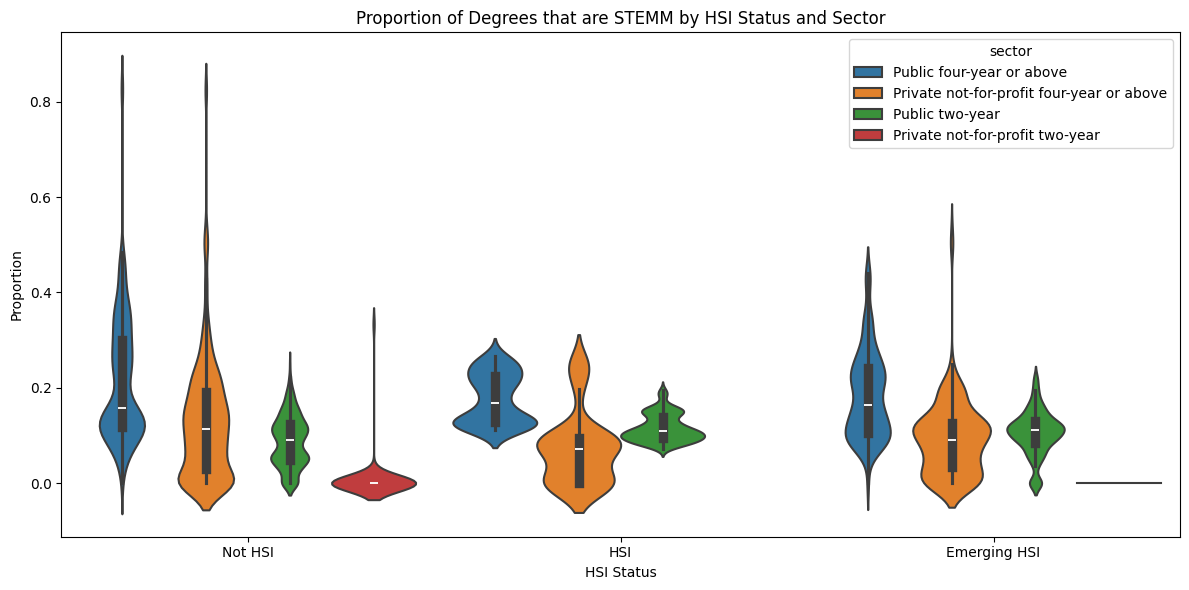

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


temp_df = df2[['excellencia_hsi_status', 'prop.stem', 'sector']].dropna()
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.color_palette("rocket")
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='prop.stem',  # Use log-transformed values for better visualization
    hue='sector',
    #palette={'Public': '#E41A1C', 'Private not-for-profit': '#4DAF4A', 'Private for-profit': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    #legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Proportion of Degrees that are STEMM by HSI Status and Sector')
plt.xlabel('HSI Status')
plt.ylabel('Proportion')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(7088, 2)


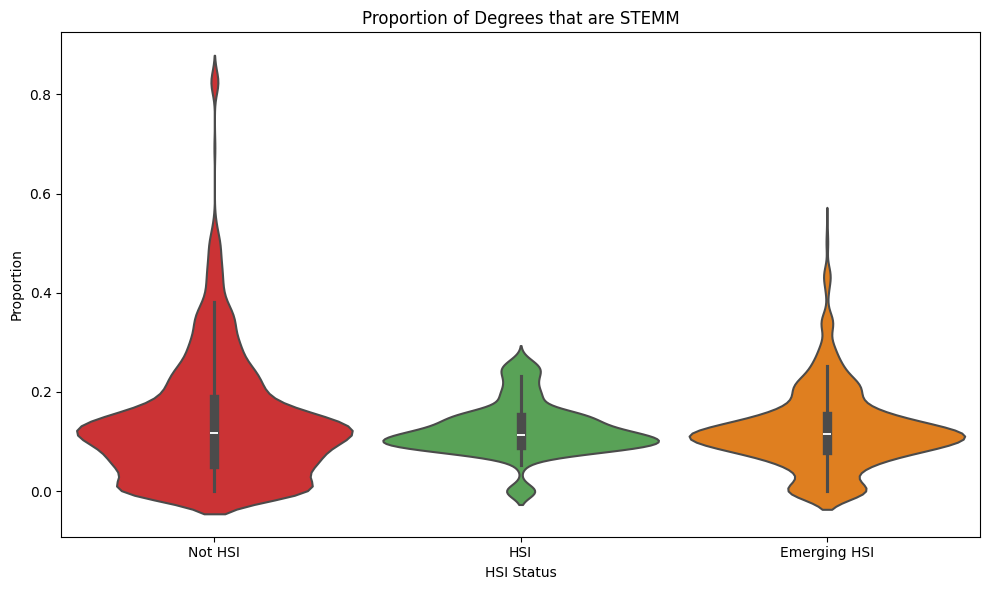

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


temp_df = df2[['excellencia_hsi_status', 'prop.stem']].dropna()
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='prop.stem',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Proportion of Degrees that are STEMM')
plt.xlabel('HSI Status')
plt.ylabel('Proportion')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()


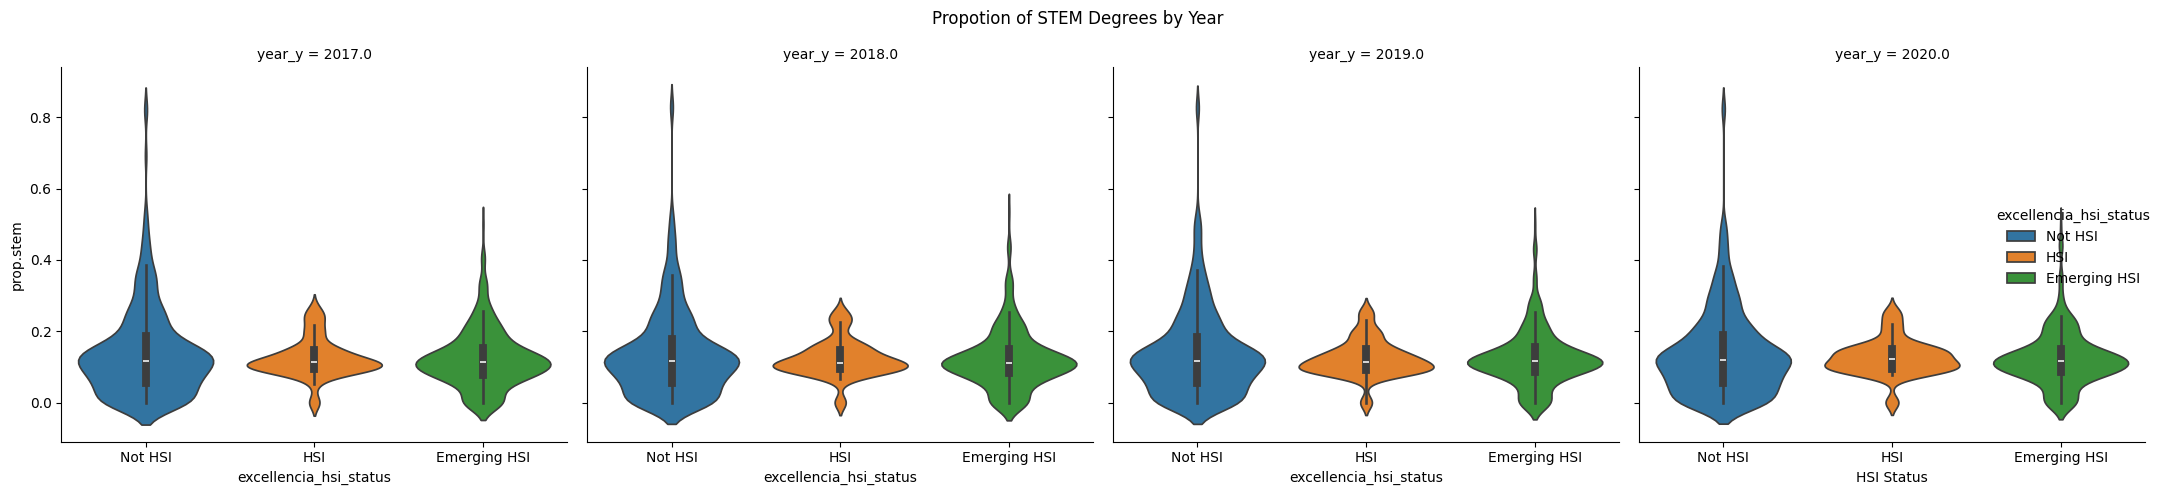

In [70]:
g=sns.catplot(data=df2, x="excellencia_hsi_status", y="prop.stem", col="year_y",hue="excellencia_hsi_status", kind="violin")

plt.xlabel('HSI Status')
plt.ylabel('Proportion')
# Add a title to the entire figure
g.fig.suptitle("Propotion of STEM Degrees by Year")

# Adjust the position of the title (optional)
g.fig.subplots_adjust(top=0.85)
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(224, 3)


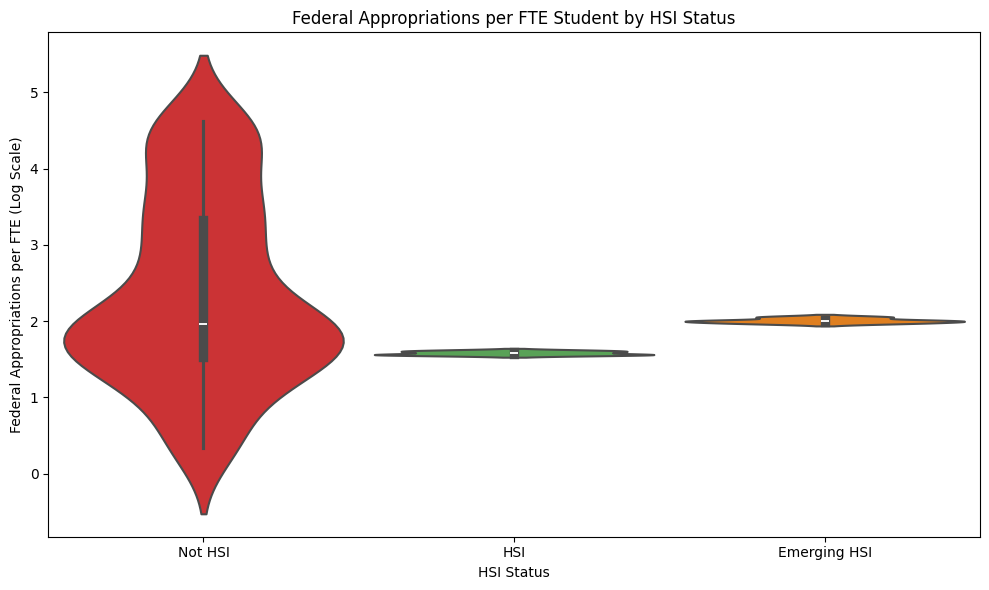

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df2['logrevfedpc'] = np.log10(df2['revfedpc'])
temp_df = df2[['excellencia_hsi_status', 'revfedpc','logrevfedpc']].dropna()

#temp_df = temp_df[temp_df['revfedpc'] < 300]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='logrevfedpc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Federal Appropriations per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Federal Appropriations per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

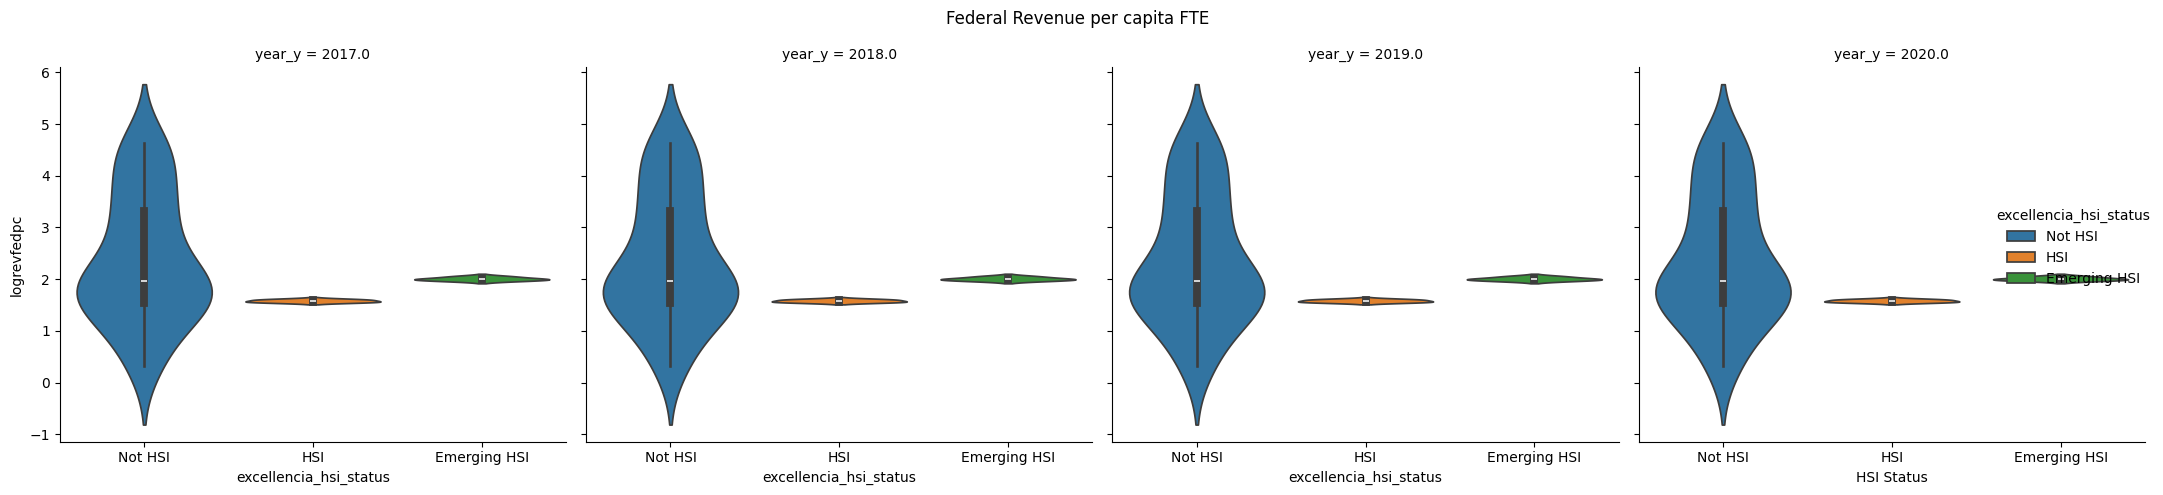

In [79]:
g=sns.catplot(data=df2, x="excellencia_hsi_status", y="logrevfedpc", col="year_y",hue="excellencia_hsi_status", kind="violin")

plt.xlabel('HSI Status')
plt.ylabel('Proportion')
# Add a title to the entire figure
g.fig.suptitle("Federal Revenue per capita FTE")

# Adjust the position of the title (optional)
g.fig.subplots_adjust(top=0.85)
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(7040, 3)


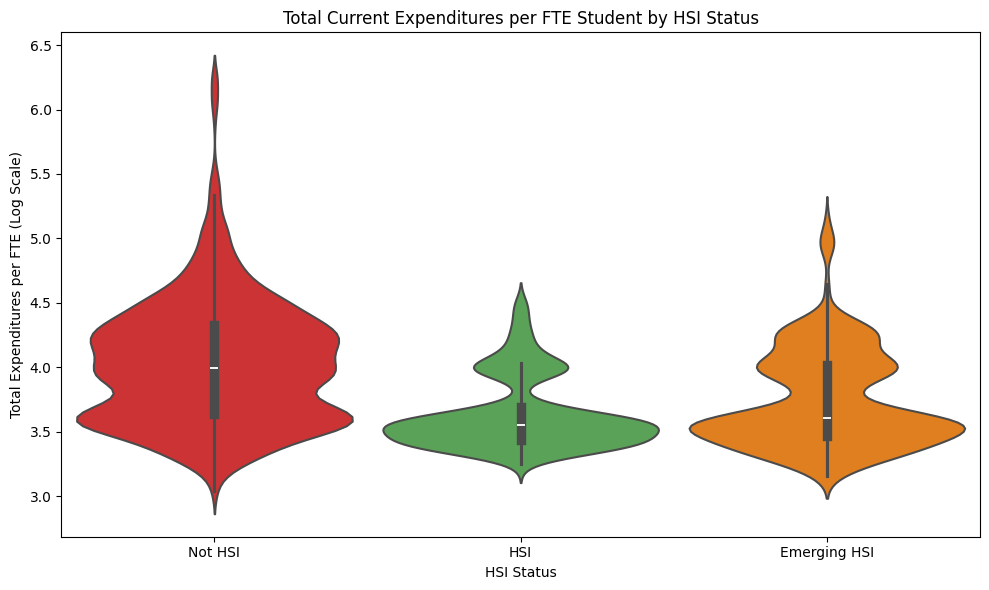

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logexptotalcurpc']=np.log10(df2['exptotalcurpc'])
temp_df = df2[['excellencia_hsi_status', 'exptotalcurpc','logexptotalcurpc']].dropna()
#temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='logexptotalcurpc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Total Current Expenditures per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Total Expenditures per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(6470, 3)


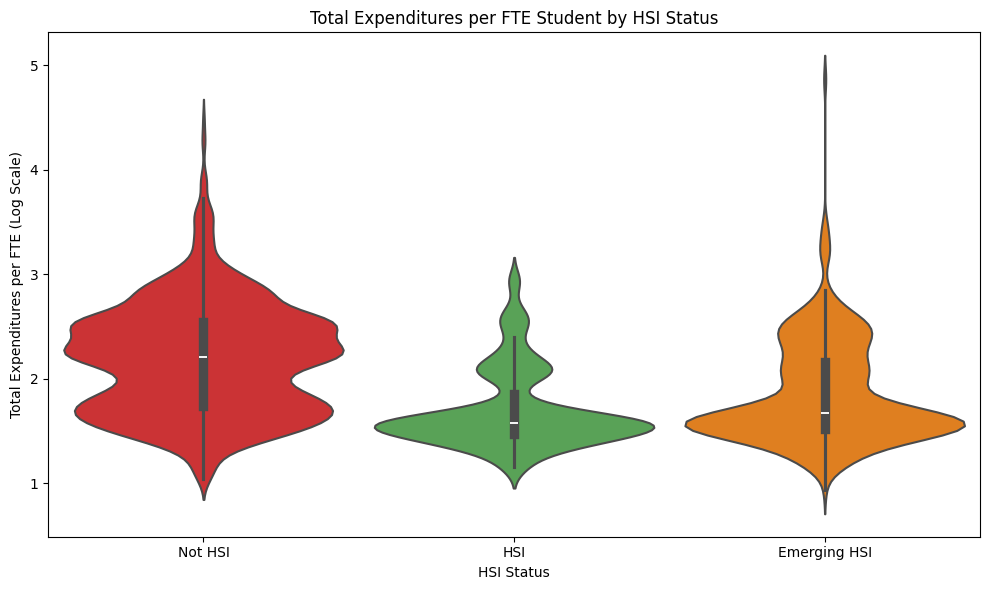

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logexptotalpc']=np.log10(df2['exptotalpc'])
temp_df = df2[['excellencia_hsi_status', 'exptotalpc','logexptotalpc']].dropna()
#temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='logexptotalpc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Total Expenditures per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Total Expenditures per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

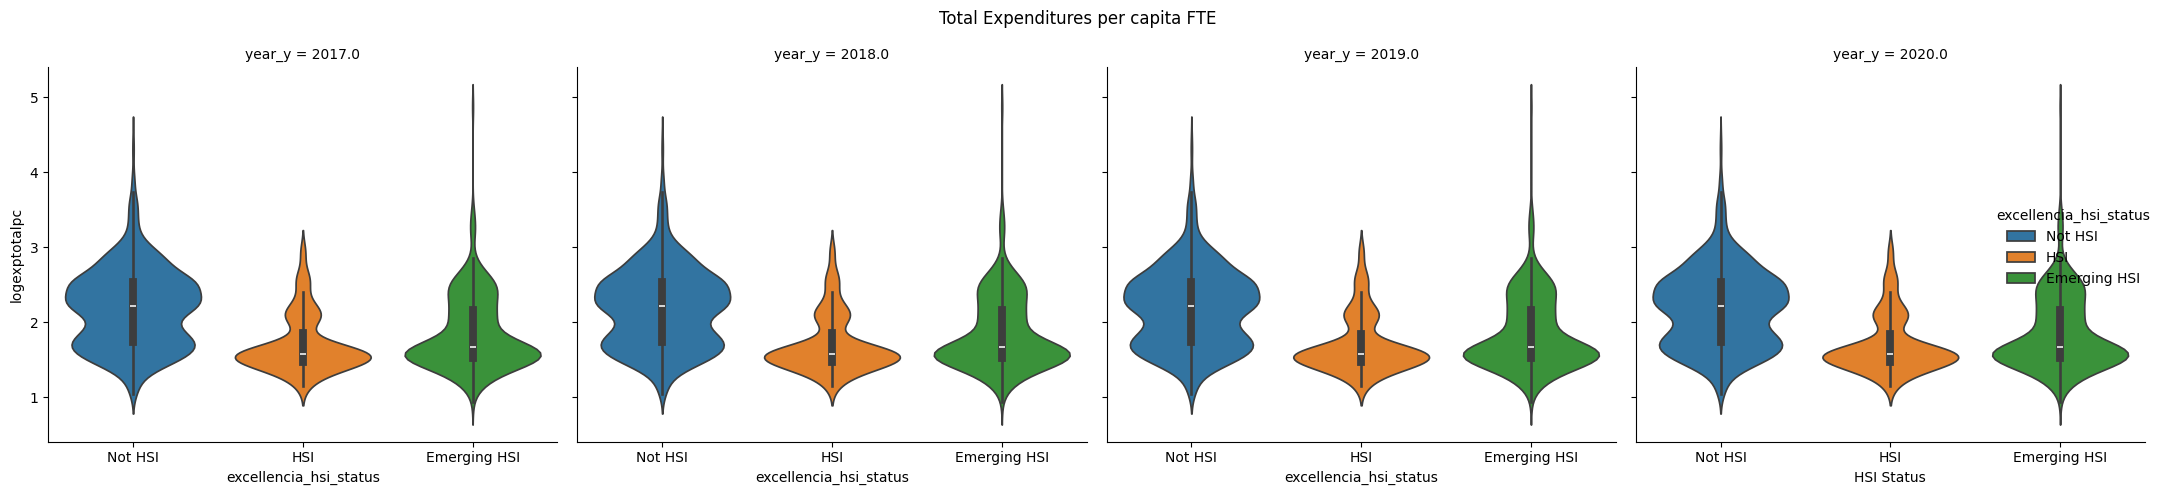

In [88]:
g=sns.catplot(data=df2, x="excellencia_hsi_status", y="logexptotalpc", col="year_y",hue="excellencia_hsi_status", kind="violin")

plt.xlabel('HSI Status')
plt.ylabel('Proportion')
# Add a title to the entire figure
g.fig.suptitle("Total Expenditures per capita FTE")

# Adjust the position of the title (optional)
g.fig.subplots_adjust(top=0.85)
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(6438, 3)


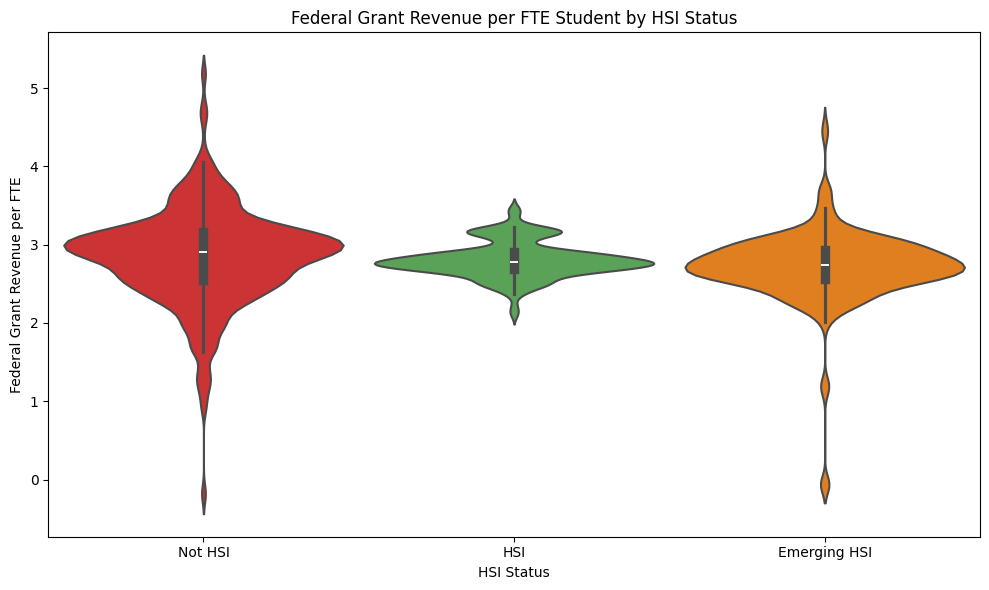

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logrevgrantspc']=np.log10(df2['revgrantspc'])
temp_df = df2[['excellencia_hsi_status', 'revgrantspc','logrevgrantspc']].dropna()
#temp_df = temp_df[temp_df['revgrantspc'] < 20000]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='logrevgrantspc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Federal Grant Revenue per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Federal Grant Revenue per FTE')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(5362, 2)


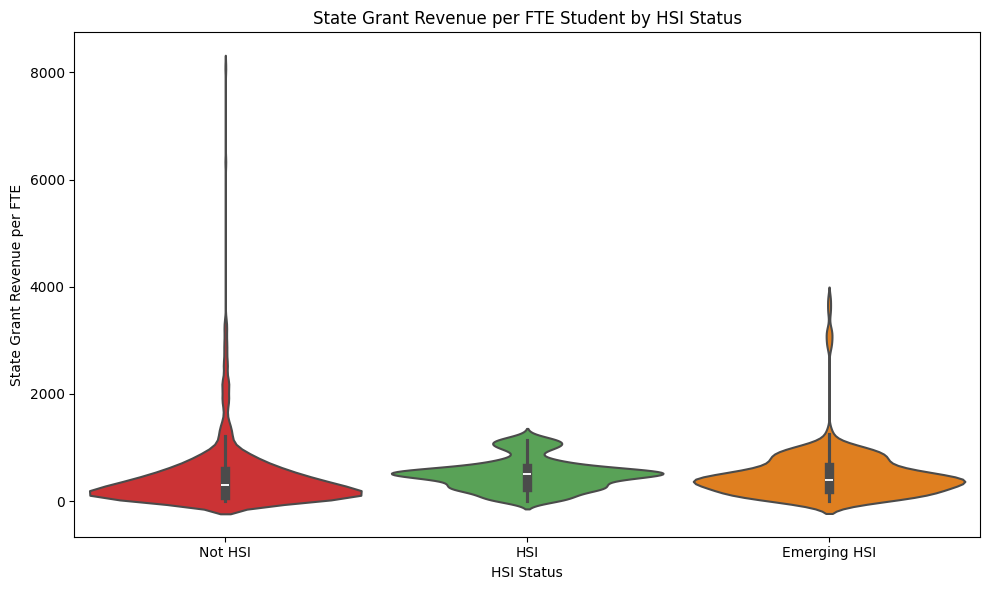

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
temp_df = df2[['excellencia_hsi_status', 'revgrantsstatepc']].dropna()
temp_df = temp_df[temp_df['revgrantsstatepc'] < 10000]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='revgrantsstatepc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('State Grant Revenue per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('State Grant Revenue per FTE')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(5392, 2)


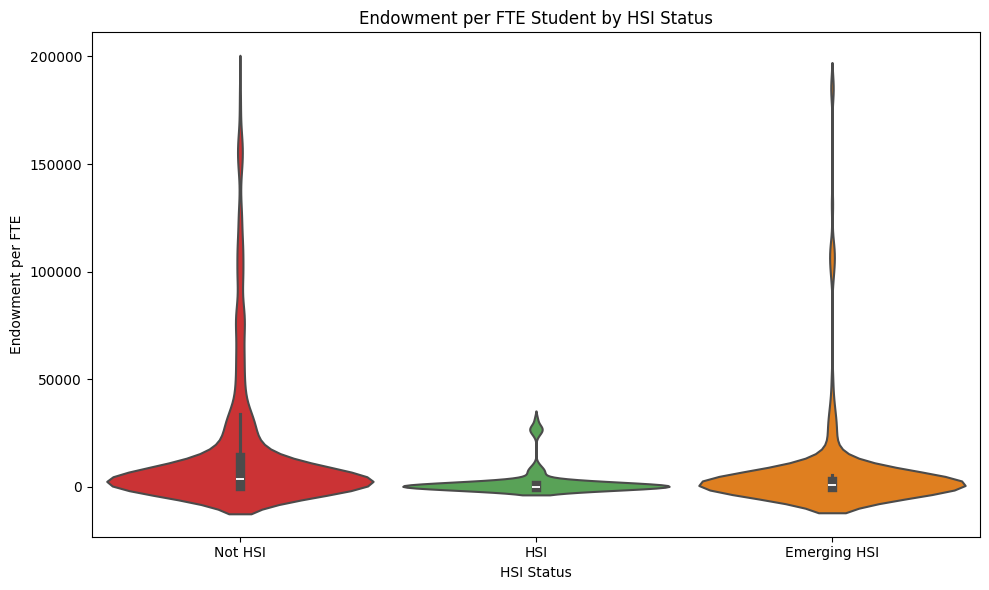

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
temp_df = df2[['excellencia_hsi_status', 'endowmentpc']].dropna()
temp_df = temp_df[temp_df['endowmentpc'] < 200000]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='endowmentpc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Endowment per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Endowment per FTE')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(7040, 3)


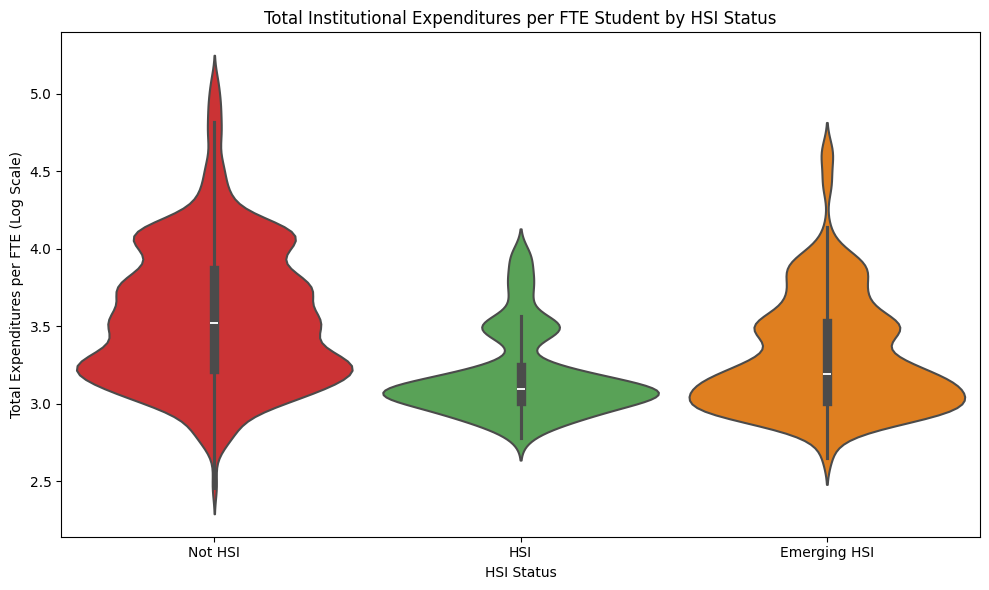

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logexpinstpc']=np.log10(df2['expinstpc'])
temp_df = df2[['excellencia_hsi_status', 'expinstpc','logexpinstpc']].dropna()
#temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='logexpinstpc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Total Institutional Expenditures per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Total Expenditures per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(2582, 3)


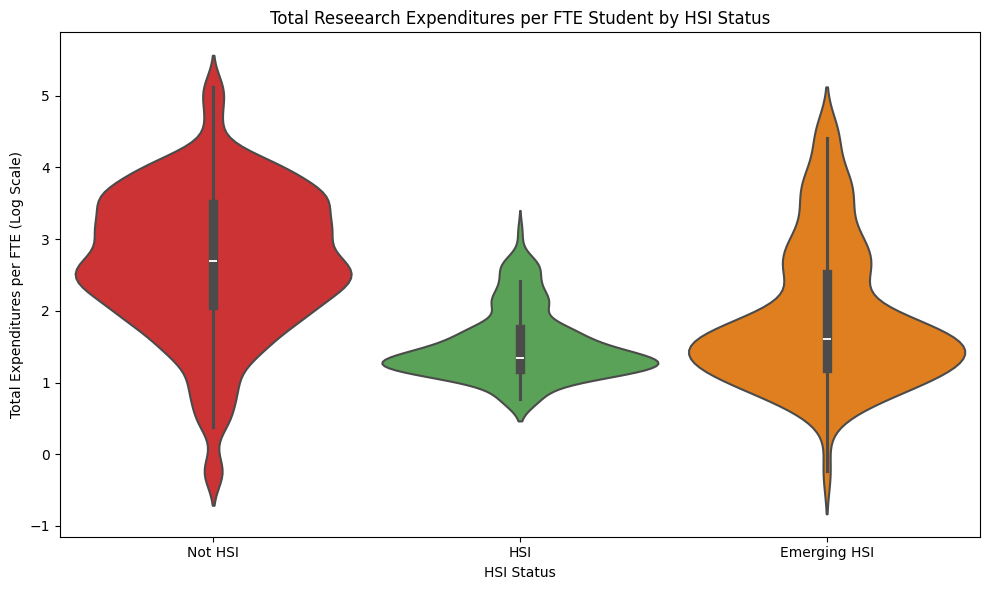

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logexpresearchpc']=np.log10(df2['expresearchpc'])
temp_df = df2[['excellencia_hsi_status', 'expresearchpc','logexpresearchpc']].dropna()
#temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='logexpresearchpc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Total Reseearch Expenditures per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Total Expenditures per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(7024, 3)


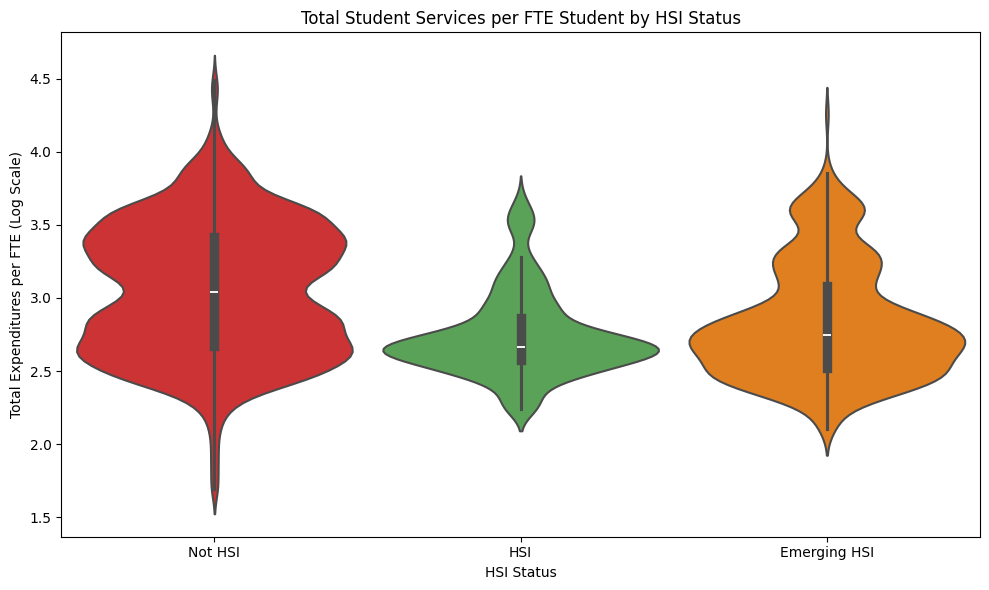

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logexpstudentservpc']=np.log10(df2['expstudentservpc'])
temp_df = df2[['excellencia_hsi_status', 'expstudentservpc','logexpstudentservpc']].dropna()
#temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='logexpstudentservpc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Total Student Services per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Total Expenditures per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(7088, 3)


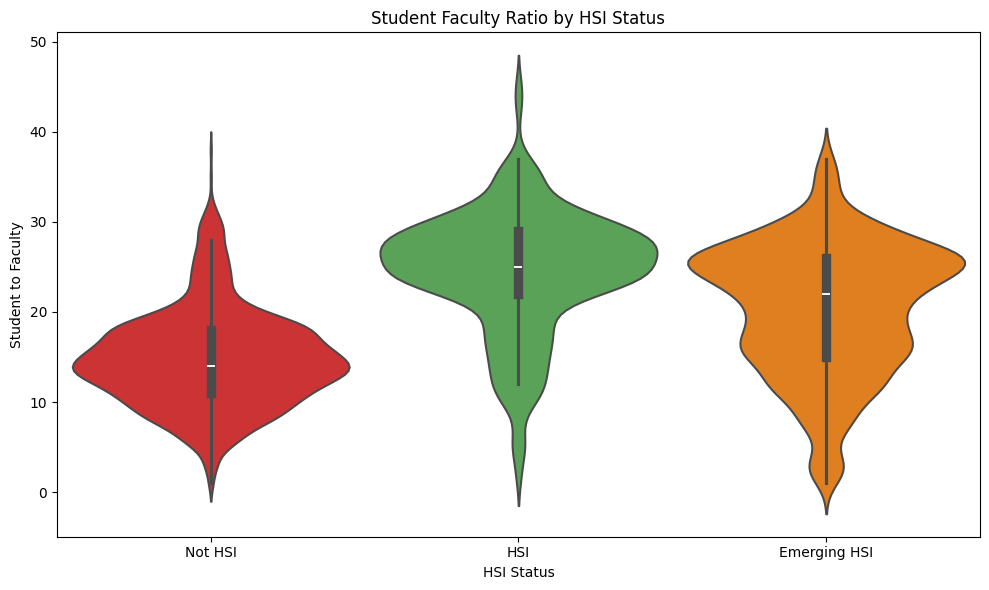

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logstudent_faculty_ratio']=np.log10(df2['student_faculty_ratio'])
temp_df = df2[['excellencia_hsi_status', 'student_faculty_ratio','logstudent_faculty_ratio']].dropna()
#temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='student_faculty_ratio',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Student Faculty Ratio by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Student to Faculty')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

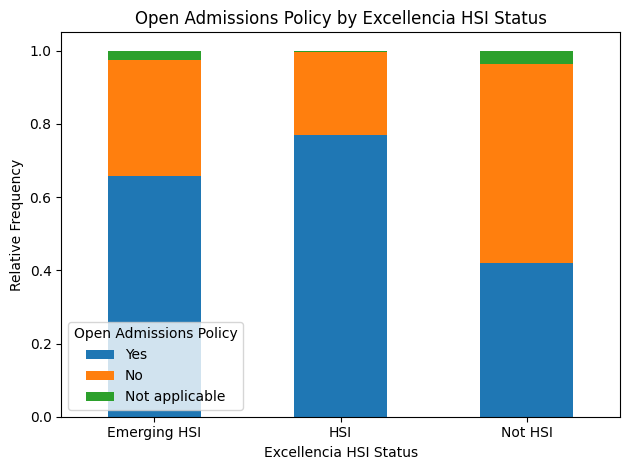

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate relative frequencies
relative_freq = df2.groupby('excellencia_hsi_status')['open_admissions_policy'].value_counts(normalize=True).unstack()

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
relative_freq.plot(kind='bar', stacked=True)  # Create stacked bar plot

# Customize plot
plt.title('Open Admissions Policy by Excellencia HSI Status')
plt.xlabel('Excellencia HSI Status')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Open Admissions Policy')

plt.tight_layout()
plt.show()